In [63]:
%pylab inline
import numpy as np
import matplotlib as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Proyecto final 
##Modelo matemático para un circuito genético: Bacteria biorremediadora de Mercurio

###Paula Manuela Siauchó Unriza-201126749


La Biología Sintética es un campo interdisciplinar que une conocimeinto de la Biología, Física, Matemáticas, entre otros. En este campo se utilizan genes de distintos organismos para hacer nuevos circuitos genéticos que cumplan un función determinada dentro de un ser vivo. De esta manera se pueden diseñar bacterias que biorremedien aguas contaminadas con metales muy tóxicos,  detecten minas antipersonales o emitan distintos olores según las condiciones ambientales. 
La contaminación por mercurio es un gran problema en la actualidad y la minería, una de las principales fuentes. En esta actividad económica, que se hace desde la época de los romanos, se utiliza el metal pesado para separar el oro del resto de elementos que están en la tierra en una manera muy similar al proceso de destilación (Drasch, Böse-O’Reilly, Beinhoff, Roider, & Maydl, 2001). Después de purificar el oro los sobrantes se arrojan a la atmósfera o a las fuentes de agua. El consumo del mercurio por todo tipo de animales resulta tóxico en muy bajas cantidades (a partir de 2 microgramos se empiezan a tener síntomas) y los diagnósticos para intoxicación con mercurio suelen ser por debajo de 10 ug/l (Ibrahim, Froberg, Wolf, & Rusyniak, 2006). Esta contaminación se puede dar en fuentes hídricas y es un gran problema de la minería en Colombia. Aunque ya existen otras técnicas para la extracción de oro menos inseguras, este método es mucho más barato y fácil de usar y es preferido de la minería artesanal y la ilegal, dos actividades comunes en Colombia(“Revista de Logística - Colombia,” 2012). Teniendo en cuenta lo anterior se diseñó una bacteria que pudiera resolver el problema. 
Además, ya que los recursos de laboratorio son limitados, tanto temporal como económicamnte es necesario hacer una simulación que permita preveer los problemas que puede haber en la práctica. Inspirado en lo anterior, l objetivo de mi proyecto es ver el comportamiento de un circuito genético a partir de las ecuaciones diferenciales que modelan el mismo mediante distintos métodos computacionales vistos en clase. Dentro del mismo se va a incluir un modelo determinista y  uno estócástico. 

Se pretende diseñar un contructo que se encarge de secuestrar mercurio en el agua y después pasarlo a una forma menos tóxica. Se propone utilizar el siguiente circuito:

 
![](https://github.com/PaulaSiauchoU/MC/blob/master/Im%C3%A1genes/constructo.png)

**No se está mostrando la imagen en el notebook pero este es el link en git hub** 

https://github.com/PaulaSiauchoU/MC/blob/master/Im%C3%A1genes/constructo.png


Donde pHg corresponde a un promotor que es sensible al mercurio, es decir los genes bajos los que está sólo se van a transcribir en presencia de este metal.  Además hay 5 genes tres para tratar el mercurio, uno para controlar la población de bacterias y el uĺtimo activa el segundo promotor provocando un feedback positvo. 
Las ecuaciones se modelan según la cinetica de Michaelis Menten  y la ecuación de Hill que describen la cinética de enzimas, proteínas y/o moléculas segúna sea el caso.

Cada una de las flechas orientadas hacia la derecha corresponde a un promotor, la cuál tiene una tasa de traducción asociada(probabilidad de que se pegue una polimerasa a ella) y está representada por **K**. Los bloques que le siguen al promotor se denomina genes y son lo que se convierten en preínas después de traducidos y cumplen una función específica. En este caso, 
MerP codifica para la enzima MerP que es una pequeña proteína periplasmática transportadora que lleva el mercurio al citoplasma de la célula.(Barkay, Miller, & Summers, 2003)

MerT tiene una actividad parecida pero este gen es más esencial. Adicionalmente se utilizará una gen , llamado MerA, que transforma el metilmercurio en un compuesto menos tóxico. 

Para lograr el feedback positivo se propone usar dos promotores. El primero se activa en presencia de mercurio que transcribe todos los genes incluyendo uno que activa el segundo promotor (pT7), que es el responsable de la retroalimentación positiva. 



####Ecuaciones
Para modelar un sistema bioquímico normalmente se tienen en cuenta los procesos de creación y destrucción de proteínas. En los procesos de creación se encuentran principalmente la cinética de Michaelis Menten, la Ecuación de Hill y la producción basal. El primero modela cinética enzimática, que en este caso no se va a utilizar y la producción basa, como no son genes típicos de la *bacteria chasis* no se tiene en cuenta. Lo anterior nos dela con la ecuación de Hill únicamente que tiene esta expresión:
$$ \theta = {K \over ({k \over [L]})^n+1} $$  (Hill, 1910)

Donde **k** representa la constante de Hill, la cual indica disociación. **n**,por otro lado es el coeficiente de Hill el cual toma valores generalmente entre 1 y 2. En este caso se tomó el valor de -1 porque sólo hay un sitio donde se pega la polimerasa y con signo negativo ya que tiene cooperatividad positiva. 

Teniendo en cuenta lo anterior las ecuaciones diferenciales a resolver son las siguientes :


$$ P_{0} = \frac{Ptot}{1+(\frac{Hg}{K_{2}})^{-1}}$$



$$ \dot{a} = \frac{K_{hg}}{1+(\frac{P_{0}}{k_{1}})^{-1}} + \frac{K{r}}{1+ (\frac{A}{k{1}})^{-1}} - \gamma_{r}*a$$
 
$$\dot{b} = \frac{K_{hg}*r1}{1+(\frac{P_{0}}{k_{1}})^{-1}} + \frac{K{r}*r1}{1+ (\frac{A}{k{1}})^{-1}} - \gamma_{r}*b$$
 
$$ \dot{c} = \frac{K_{hg}*r2}{1+(\frac{P_{0}}{k_{1}})^{-1}} + \frac{K{r}*r2}{1+ (\frac{P{a}}{k{1}})^{-1}} - \gamma_{r}*c$$
  
$$ \dot{d} = \frac{K_{hg}*r3}{1+(\frac{P_{0}}{k_{1}})^{-1}} + \frac{K{r}*r3}{1+ (\frac{P{a}}{k{1}})^{-1}} - \gamma_{r}*d$$
   
$$ \dot{e} = \frac{K_{hg}*r4}{1+(\frac{P_{0}}{k_{1}})^{-1}} + \frac{K{r}*r4}{1+ (\frac{P{a}}{k{1}})^{-1}} -  \gamma_{r}*e $$
   
   
La primera ecuación modela el impulso del sistema. Está en estado estable por lo que no es una ecuación diferencial.

La ecuación diferencial sobre  “a”  representa la actividad del gen T-7,  la “e” sobre la antitoxina, la ecuación “b” corresponde MerP, la ecuación “c”  es para MerT ,y  la ecuación “d” es de MerA. Las ecuaciones tiene dos ecuaciones de Hill que corresponde a los promotores, estos promotores tienen cada uno una retroalimentación positiva, una debido al mercurio, la cual inicia el procesos de producción, y otra con un el producto del gen T-7 que es un ARN polimerasa. Las constantes KHg y Kr son las tasas máximas de transcripción,  y  k1 y k2 son las tazas de disociación.  Las constantes r indican cómo se debilita la actividad del motor con respecto a un gen debido a los genes que se encuentran entre ellos. 

Para ver el comportamiento del sistema se resuelven las ecuaciones mediate el método Runge Kutta. Además se repite este mismo procedimiento pero para el caso en el que no hay Feedback positivo. 


#Primer Runge Kutta
###Feedback positivo

In [89]:
#Definición de las constantes

pt=100.  #Cantidad de proteína que se une al mercurio antes de prender el circuito
cHg=1000.0 #Concentración de mercurio para activar el sistema  
KHg=300.0 #Tasa máxima de transcripción de Mercurio
Kr=300.0 #Tasa máxima de transcripción 
r1=0.9
r2=0.8
r3=0.7 
r4=0.6
gr=0.033 #tasa de degradación proteína (no definida)
k1=3000 #Tasa de disociación
k2=3000. #Tasa de disociación
h=0.2
Ptot=100. #Proteína total
#Hg=1. #Concentración Mercurio inicial.

n_points = int((4000.0+h)/h)
t = np.zeros(n_points)
A = np.zeros(n_points) #Antitoxina
B = np.zeros(n_points) #MerP
C = np.zeros(n_points) #MerT
D = np.zeros(n_points) #MerA
E = np.zeros(n_points) #T7
Hg= np.zeros(n_points)
Po= np.zeros(n_points)



In [90]:
#Definición de las ecuaciones 
#def Po(Hg):
#    return Ptot/(1+(k2/Hg))
def A_prima(t,A,B,C,D,E,Po):
    return (KHg)/(1+(k1/(Po+0.001)))+ (Kr/(1+ (k1/(A+0.001)))) - gr*A
                                         
def B_prima(t,A,B,C,D,E,Po):
    return (KHg*r1)/(1+(k1/(Po+0.001)))+ (Kr*r1)/(1+ (k1/(A+0.001))) - gr*B
                                         
def C_prima(t,A,B,C,D,E,Po):
    return (KHg*r2)/(1+(k1/(Po+0.001))) + (Kr*r2)/(1+ (k1/(A+0.001))) - gr*C
                                         
def D_prima(t,A,B,C,D,E,Po):
    return (KHg*r3)/(1+(k1/(Po+0.001))) + (Kr*r2)/(1+ (k1/(A+0.001))) - gr*D
                                         
def E_prima(t,A,B,C,D,E,Po):
    return (KHg*r4)/(1+(k1/(Po+0.001))) + (Kr*r4)/(1+ (k1/(A+0.001))) - gr*E
        
                                         

                                         
                                         
                                         
print KHg
print k1
print Po
print Kr
print gr
                                        

300.0
3000
[ 0.  0.  0. ...,  0.  0.  0.]
300.0
0.033


In [91]:
t[0] = 0.0
A[0] = 0.0
B[0] = 0.0
C[0] = 0.0
D[0] = 0.0
E[0] = 0.0
Hg[0] = 0.0
Po[0]=0.0

for i in range(1400):
    Po[i]=0.0
for i in range(1401,n_points):
    Po[i]=t[i]

    
for i in range(1,n_points):
  
    k1_A = A_prima(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],E[i-1],Po[i-1])
    k1_B = B_prima(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],E[i-1],Po[i-1])
    k1_C = C_prima(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],E[i-1],Po[i-1])
    k1_D = D_prima(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],E[i-1],Po[i-1])
    k1_E = E_prima(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],E[i-1],Po[i-1])
    
    #Primer paso
    
    t1 = t[i-1] + (h/2.0)
    A1 = A[i-1] + (h/2.0) * k1_A
    B1 = B[i-1] + (h/2.0) * k1_B
    C1 = C[i-1] + (h/2.0) * k1_C
    D1 = D[i-1] + (h/2.0) * k1_D
    E1 = E[i-1] + (h/2.0) * k1_E
    
    
    k2_A = A_prima(t,A,B,C,D,E,Po[i-1])
    k2_B = B_prima(t,A,B,C,D,E,Po[i-1])
    k2_C = C_prima(t,A,B,C,D,E,Po[i-1])
    k2_D = D_prima(t,A,B,C,D,E,Po[i-1])
    k2_E = E_prima(t,A,B,C,D,E,Po[i-1])


    #Segundo paso
    t2 = t[i-1] + (h/2.0)
    A2 = A[i-1] + (h/2.0) * k2_A
    B2 = B[i-1] + (h/2.0) * k2_B
    C2 = C[i-1] + (h/2.0) * k2_C
    D2 = D[i-1] + (h/2.0) * k2_D
    E2 = E[i-1] + (h/2.0) * k2_E
     
    k3_A = A_prima(t,A,B,C,D,E,Po[i-1])
    k3_B = B_prima(t,A,B,C,D,E,Po[i-1])
    k3_C = C_prima(t,A,B,C,D,E,Po[i-1])
    k3_D = D_prima(t,A,B,C,D,E,Po[i-1])
    k3_E = E_prima(t,A,B,C,D,E,Po[i-1])
        
    #Tercer paso
    t3 = t[i-1] + h
    A3 = A[i-1] + (h/2.0) * k3_A
    B3 = B[i-1] + (h/2.0) * k3_B
    C3 = C[i-1] + (h/2.0) * k3_C
    D3 = D[i-1] + (h/2.0) * k3_D
    E3 = E[i-1] + (h/2.0) * k3_E
    
    k4_A = A_prima(t,A,B,C,D,E,Po[i-1])
    k4_B = B_prima(t,A,B,C,D,E,Po[i-1])
    k4_C = C_prima(t,A,B,C,D,E,Po[i-1])
    k4_D = D_prima(t,A,B,C,D,E,Po[i-1])
    k4_E = E_prima(t,A,B,C,D,E,Po[i-1])
    
    #fourth step
    average_k_A = (1.0/6.0)*(k1_A + 2.0*k2_A + 2.0*k3_A + k4_A)
    average_k_B = (1.0/6.0)*(k1_B + 2.0*k2_B + 2.0*k3_B + k4_B)
    average_k_C = (1.0/6.0)*(k1_C + 2.0*k2_C + 2.0*k3_C + k4_C)
    average_k_D = (1.0/6.0)*(k1_D + 2.0*k2_D + 2.0*k3_D + k4_D)
    average_k_E = (1.0/6.0)*(k1_E + 2.0*k2_E + 2.0*k3_E + k4_E)

    #print type(average_k_A)
    #print type(A)
    #print len(average_k_A)
    #print len(A)
    
    t[i] = t[i-1] + h
    A[i] = A[i-1] + h * average_k_A[i-1]
    B[i] = B[i-1] + h * average_k_B[i-1]
    C[i] = C[i-1] + h * average_k_C[i-1]
    D[i] = D[i-1] + h * average_k_D[i-1]
    E[i] = E[i-1] + h * average_k_E[i-1]
    
    if (i < 1400):
        Po[i]=0.0
    if (1401<i<n_points):
        Po[i]=4*t[i]

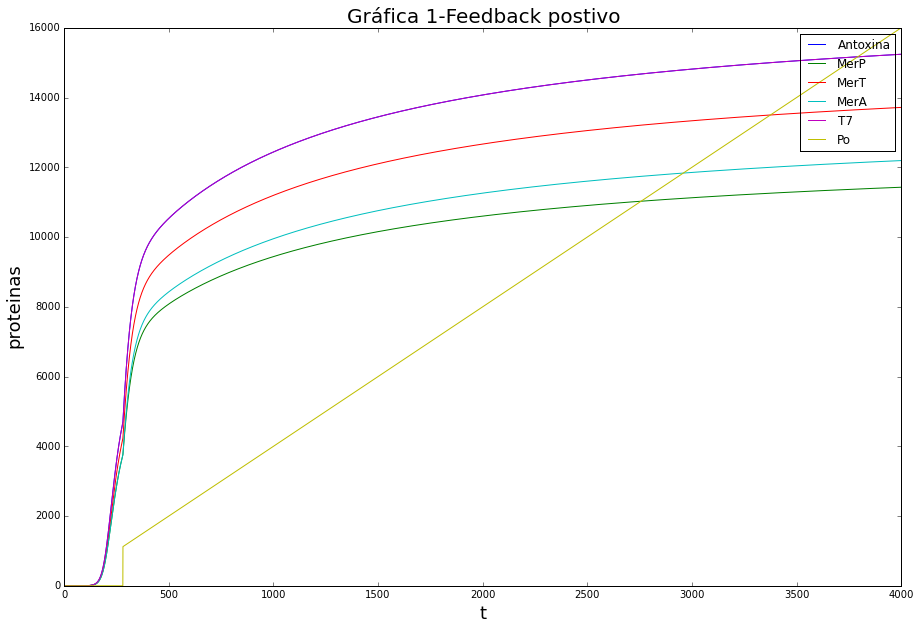

In [99]:
plot(t,A,label='Antoxina')
plot(t,D,label='MerP')
plot(t,B,label='MerT')
plot(t,C,label='MerA')
plot(t,A,label='T7')
plot(t,Po,label='Po')
xlabel('t',fontsize=18)
ylabel('proteinas',fontsize=18)
#lim(0,4000)
title(u'Gráfica 1-Feedback postivo',fontsize=20)
legend()
figure(figsize(15,10))

#Segundo Runge Kutta
###Sin Feedback positivo

En este caso se modificaron las ecuaciones mostradas anteriormente para que correspondieran a un circuito sin feedback positivo. Para eso se supuso un sistema con un solo promotor, el que es activado por merurio, y tanto el gen T7(E) como su respectivo promotor se eliminaron. Las ecuaciones se muestran a continuación,

$$ P_{0} = \frac{Ptot}{1+(\frac{Hg}{K_{2}})^{-1}}$$



$$ \dot{a} = \frac{K_{hg}}{1+(\frac{P_{0}}{k_{1}})} - \gamma_{r}*a$$
 
$$ \dot{b} = \frac{K_{hg}*r1}{1+(\frac{P_{0}}{k_{1}})}- \gamma_{r}*b$$
 
$$ \dot{c} = \frac{K_{hg}*r2}{1+(\frac{P_{0}}{k_{1}})}- \gamma_{r}*c$$
  
$$ \dot{d} = \frac{K_{hg}*r3}{1+(\frac{P_{0}}{k_{1}})}- \gamma_{r}*d$$
   


In [101]:
def A_pr(t,A,B,C,D,Po):
    return (KHg)/(1+(Po/(k1+0.001))) - gr*A
                                         
def B_pr(t,A,B,C,D,Po):
    return (KHg*r1)/(1+(Po/(k1+0.001))) - gr*B
                                         
def C_pr(t,A,B,C,D,Po):
    return (KHg*r2)/(1+(Po/(k1+0.001))) - gr*C
                                         
def D_pr(t,A,B,C,D,Po):
    return (KHg*r3)/(1+(Po/(k1+0.001))) - gr*D
                                         


In [102]:
t[0] = 0.0
A[0] = 0.0
B[0] = 0.0
C[0] = 0.0
D[0] = 0.0
Hg[0] = 0.0
Po[0]=0.0

for i in range(1400):
    Po[i]=0.0
for i in range(1401,n_points):
    Po[i]=t[i]

    
for i in range(1,n_points):
  
    k1_A = A_pr(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],Po[i-1])
    k1_B = B_pr(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],Po[i-1])
    k1_C = C_pr(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],Po[i-1])
    k1_D = D_pr(t[i-1],A[i-1],B[i-1],C[i-1],D[i-1],Po[i-1])
   
    
    #Primer paso
    
    t1 = t[i-1] + (h/2.0)
    A1 = A[i-1] + (h/2.0) * k1_A
    B1 = B[i-1] + (h/2.0) * k1_B
    C1 = C[i-1] + (h/2.0) * k1_C
    D1 = D[i-1] + (h/2.0) * k1_D
    
        
    k2_A = A_pr(t,A,B,C,D,Po[i-1])
    k2_B = B_pr(t,A,B,C,D,Po[i-1])
    k2_C = C_pr(t,A,B,C,D,Po[i-1])
    k2_D = D_pr(t,A,B,C,D,Po[i-1])
    

    #Segundo paso
    t2 = t[i-1] + (h/2.0)
    A2 = A[i-1] + (h/2.0) * k2_A
    B2 = B[i-1] + (h/2.0) * k2_B
    C2 = C[i-1] + (h/2.0) * k2_C
    D2 = D[i-1] + (h/2.0) * k2_D
     
    k3_A = A_pr(t,A,B,C,D,Po[i-1])
    k3_B = B_pr(t,A,B,C,D,Po[i-1])
    k3_C = C_pr(t,A,B,C,D,Po[i-1])
    k3_D = D_pr(t,A,B,C,D,Po[i-1])
    
        
    #Tercer paso
    t3 = t[i-1] + h
    A3 = A[i-1] + (h/2.0) * k3_A
    B3 = B[i-1] + (h/2.0) * k3_B
    C3 = C[i-1] + (h/2.0) * k3_C
    D3 = D[i-1] + (h/2.0) * k3_D
    
    k4_A = A_pr(t,A,B,C,D,Po[i-1])
    k4_B = B_pr(t,A,B,C,D,Po[i-1])
    k4_C = C_pr(t,A,B,C,D,Po[i-1])
    k4_D = D_pr(t,A,B,C,D,Po[i-1])
    
    #fourth step
    average_k_A = (1.0/6.0)*(k1_A + 2.0*k2_A + 2.0*k3_A + k4_A)
    average_k_B = (1.0/6.0)*(k1_B + 2.0*k2_B + 2.0*k3_B + k4_B)
    average_k_C = (1.0/6.0)*(k1_C + 2.0*k2_C + 2.0*k3_C + k4_C)
    average_k_D = (1.0/6.0)*(k1_D + 2.0*k2_D + 2.0*k3_D + k4_D)

    #print type(average_k_A)
    #print type(A)
    #print len(average_k_A)
    #print len(A)
    
    t[i] = t[i-1] + h
    A[i] = A[i-1] + h * average_k_A[i-1]
    B[i] = B[i-1] + h * average_k_B[i-1]
    C[i] = C[i-1] + h * average_k_C[i-1]
    D[i] = D[i-1] + h * average_k_D[i-1]
    
    if (i < 1400):
        Po[i]=0.0
    if (1401<i<n_points):
        Po[i]=4*t[i]

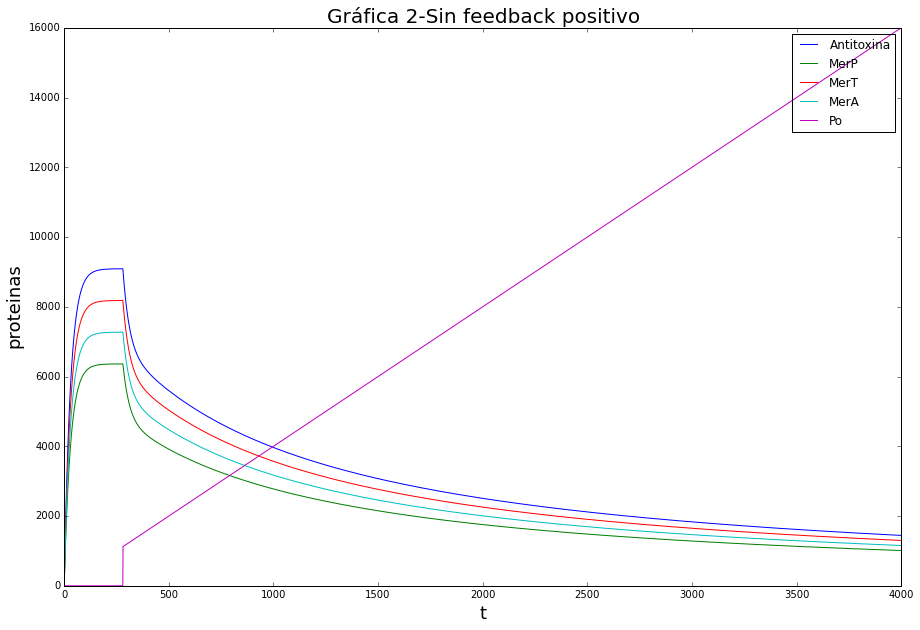

In [103]:
plot(t,A,label='Antitoxina')
plot(t,D,label='MerP')
plot(t,B,label='MerT')
plot(t,C,label='MerA')
plot(t,Po,label='Po')
xlabel('t',fontsize=18)
ylabel('proteinas',fontsize=18)
#lim(0,4000)
title(u'Gráfica 2-Sin feedback positivo', fontsize=20)
legend()
figure(figsize(15,10))

#Simulación estocástica

Lo mostrado anteriormente supone que los organismos siempre actúan de la misma manera, lo cual no pasa en el mundo real. Debido a lo anterior, es necesario hacer una simulación estocástica que permita ver un comportamiento más cercano a la realidad y se puedan corregir aspectos como el ruido debido a la estructura del constructo. A continuación, se utilizará el método de Montecarlo para hacer dicha simulación. 

In [97]:


n=200000 #Número de pasos 
m=100 #Número de células
#MatrizRNA=zeros(m,n); #Matriz de RNA.
MatrizP=np.zeros([m,n])  #Matriz de proteínas. 
tt=3000 #Tiempo de la simulación
#La probabilidad de creación de una proteína está basado en los eventos que crean una proteína y los que la 
#destruyen dividido entre el número de eventos. 


#probCreacionRNA=tt*kr/n;
#probDegradRNA=tt*gr/n;
 
#mRNAcreado=0;
#mRNAdestruido=0; 
 
probCreacionP = tt*(KHg+Kr)/n #Las probabilidades están dadas por las tasas a las que se produce la proteína. 
probDegradP = tt*2*gr/n #Probabilidad dad por la tasa de degradación
 
PCreada = 0
PDestruida = 0

a1=random.random()
a2=random.random()


for i in range (m):
    for j in range (n):
        
        if (random.random() < probCreacionP):
            PCreada = 1
        else: 
            PCreada = 0
        if MatrizP[i,j] >= 1:
            for k in range(MatrizP[i,j]):
                if (random.random() > probDegradP):
                    PDestruida=PDestruida+1
                else:
                    PDestruida=PDestruida+0
                
        MatrizP[i][j] = MatrizP[i,j-1] + (PCreada - PDestruida)
        PCreada = 0
        PDestruida = 0
        



57735.0269182
[  5.77350269e+04   2.88675135e+04   1.92450090e+04 ...,   2.88678021e-01
   2.88676578e-01   2.88675135e-01]


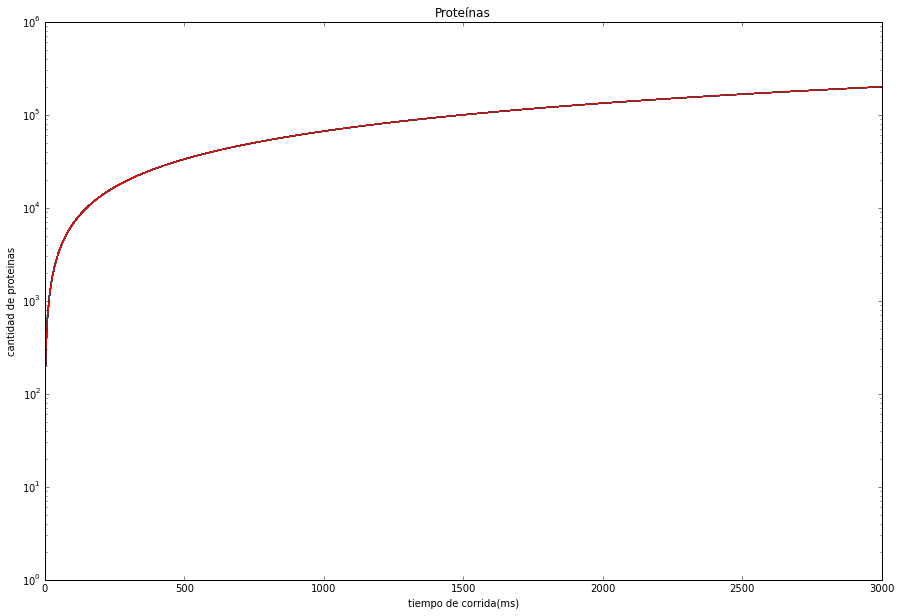

In [108]:

#Promedio de la proteína
PromP=np.zeros([n])
for i in range(n):
    PromP[i]= np.mean(MatrizP[:,i])


#Desviación estándar 

STD_P = np.std(MatrizP)
print STD_P 
#Ruido de la simulación
 
RuidoP = STD_P/PromP
print RuidoP
#Ciclo para poner la gráfica en el tiempo de corrida y no en pasos. 
tiempo=np.zeros([n])
for i in range(1,n):
    tiempo[i]=(i-1)*tt/n


step(tiempo,PromP)
pyplot.yscale('log')


#Gráfica Proteínas

for i in range (m):
    step(tiempo , MatrizP[i])
    title (u'Proteínas')
    xlabel('tiempo de corrida(ms)')
    ylabel('cantidad de proteinas')



##Conclusiones

El modelo determiniosta muestra que el diseño hecho inicialmente efectivamente funciona para obtener un feedback positivo. Lo anterior se observa en la gráfica 1 en la que se ve una respuesta con un crecimiento rápido, la cual se va a estabilizando cerca de los 4000 minutos. Se tiene que tener en cuenta que el tiempo de generación de la bactería en la que se encontraría el constructo, *E.coli*, tiene un tiempo de generación de 30 minutos, es decir, se reproduce cada media hora. Esto indica que en las primeras 60 horas se han producido cerca de 16000 proteínas y la gráfica muestra que ese número aumenta.
En cambio, en la gráfica dos se suprimió en sistema de retroalimentación positiva al quitar el efecto del promotor T7 y su respectivo gen que lo activa (T7). Como resultado se observa un pico máximo a los 500 minutos, que no llega a ser la mitada del máximo en el primer caso. Por lo tanto se puede decir que el constructo funciona según lo esperado. 

En cuanto a la simulación estocástica, tiene un comportamiento muy parecido al determinista, lo cual se puede ver en la última gráfica en la que está el promedio del total de células. Sin embargo, la desviación estándar tiene un valor muy alto, 577735, esto se debe a que sólo se hizo la simulación sobre 100 células, lo cual no permite ver cómo se comporta la población con exactitud por la cantidad de ruido que se tiene. No se hizo una simulación con más células debido al poder computacional del equipo usado. Para solucionar esto se podrían usar algoritmos más eficientes como el Guillespie que no tiene en cuenta todos los pasos si no sólamente en tiempo en el que se produce un éxito, en este caso, la creación de una proteína.(Guillespie, 1977) 

##Bibliografía. 


 http://2010.igem.org/Team:Peking/Project/Biosensor/PromoterCharacterizationd
 
Barkay, T., Miller, S. M., & Summers, A. O. (2003). Bacterial mercury resistance from atoms to ecosystems. FEMS Microbiology Reviews, 27(2-3), 355–384. http://doi.org/10.1016/S0168-6445(03)00046-9

Ibrahim, D., Froberg, B., Wolf, A., & Rusyniak, D. E. (2006). Heavy Metal Poisoning: Clinical Presentations and Pathophysiology. Clinics in Laboratory Medicine, 26(1), 67–97. http://doi.org/10.1016/j.cll.2006.02.003

Rouch, D. A., Parkhill, J., & Brown, N. L. (1995). Induction of bacterial mercury- and copper-responsive promoters: Functional differences between inducible systems and implications for their use in gene-fusions for in vivo metal biosensors. Journal of Industrial Microbiology, 14(3-4), 349–353. http://doi.org/10.1007/BF01569950

Mercurio (Hg) Propiedades químicas y efectos sobre la salud y el medio ambiente. (n.d.). Retrieved July 13, 2015, from http://www.lenntech.es/periodica/elementos/hg.htm

Pires, C., Marques, A. P. G. C., Guerreiro, A., Magan, N., & Castro, P. M. L. (2011). Removal of heavy metals using different polymer matrixes as support for bacterial immobilisation. Journal of Hazardous Materials, 191(1-3), 277–286. http://doi.org/10.1016/j.jhazmat.2011.04.079

Revista de Logística - Colombia. (n.d.). Retrieved July 19, 2015, from http://www.revistadelogistica.com/Mineria-de-oro-en-Colombia-auge-y-problematica.asp

Drasch, G., Böse-O’Reilly, S., Beinhoff, C., Roider, G., & Maydl, S. (2001). The Mt. Diwata study on the Philippines 1999 — assessing mercury intoxication of the population by small scale gold mining. Science of The Total Environment, 267(1–3), 151–168. http://doi.org/10.1016/S0048-9697(00)00806-8
Hill, A. V. (1910-01-22). "The possible effects of the aggregation of the molecules of hæmoglobin on its dissociation curves" (PDF). J. Physiol. 40 (Suppl): iv–vii. Retrieved 2015-06-18.

Gillespie, Daniel T. (1977). "Exact Stochastic Simulation of Coupled Chemical Reactions". The Journal of Physical Chemistry
